In [132]:
import pandas as pd

titanic = pd.read_csv('titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [133]:
#Age에 결측값이 있으므로 이 결측값을 평균으로 채워넣기
age_mean = titanic.Age.mean()
age_mean

29.69911764705882

In [134]:
titanic.Age = titanic.Age.fillna(age_mean)

In [135]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [136]:
# 사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않는다.
titanic.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       687
                                                                                 False  False       202
                                                                                        True          2
dtype: int64

In [137]:
titanic.Cabin = titanic.Cabin.fillna('N')
titanic.Embarked = titanic.Embarked.fillna('N')

In [138]:
titanic.isna().value_counts() #결측값이 전부 대체되었다.

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  False  False       891
dtype: int64

In [139]:
#성별에 따른 생존자 수를 비교한 바 그래프 만들기

In [140]:
titanic.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

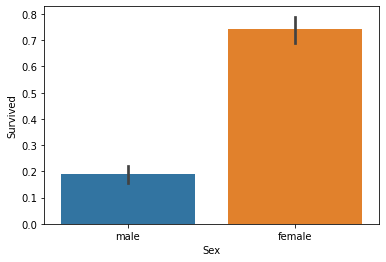

In [141]:
import seaborn as sns

sns.barplot(data = titanic, x = 'Sex', y = 'Survived')

In [142]:
#부에 따른 생존율을 나타낸 바 그래프 만들기
#부를 측정할 수 있는 속성으로 적당한 것은 객실 등급(Pclass)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

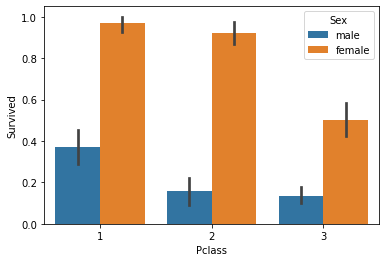

In [143]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [144]:
#Age를 범위별로 분류하는 카테고리를 만들고 바 그래프 나타내기

In [145]:
def age_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [146]:
titanic['Age_cat'] = titanic['Age'].apply(lambda x : age_category(x)) #칼럼추가

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

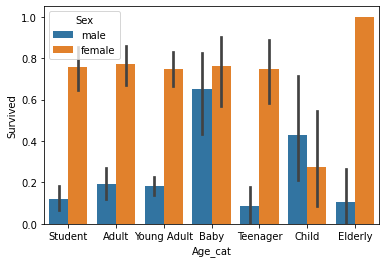

In [147]:
sns.barplot(data=titanic, x='Age_cat', y='Survived', hue='Sex')

In [148]:
group_name = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
#나이순으로 칼럼 정렬함

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

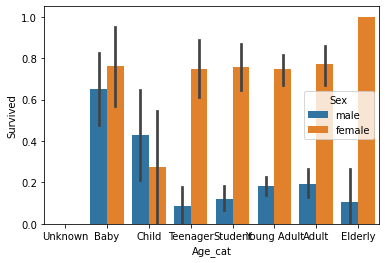

In [149]:
sns.barplot(data=titanic, x='Age_cat', y='Survived', hue='Sex', order=group_name)

In [150]:
titanic = titanic.drop(['Age_cat'], axis=1)  #나중을 위해 컬럼을 삭제함
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [151]:
#Cabin을 LabelEncoding 하기

In [152]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin']
#칼럼을 스트링으로 만들고 앞글자만 따기
#쉽게 레이블인코딩 하기 위해서

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [153]:
titanic['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin']).tolist()
titanic['Cabin']

0      7
1      2
2      7
3      2
4      7
      ..
886    7
887    1
888    7
889    2
890    7
Name: Cabin, Length: 891, dtype: int64

In [155]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

titanic['Cabin'] = encoder.fit_transform(titanic['Cabin']).tolist()
titanic['Sex'] = encoder.fit_transform(titanic['Sex']).tolist()
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked']).tolist()
titanic[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [156]:
# 칼럼 삭제하기 : PassengerId, Name, Ticket

In [157]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [158]:
#DecisionTreeClassifier, RandomForestClassifier, LogisticRegression
#학습/예측/평가

In [159]:
# target에 해당하는것이 Survived이다.
# 나머지는 피쳐들로 보내기

features = X = titanic.iloc[:, 1:]
labels = y = titanic.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=11) #4개로 받았다.

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [161]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [162]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

print('정확도:', accuracy_score(y_test, pred).round(4))

정확도: 0.8045


In [163]:
rf_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

print('정확도:', accuracy_score(y_test, pred).round(4))

정확도: 0.8045


In [164]:
lr_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

print('정확도:', accuracy_score(y_test, pred).round(4))

정확도: 0.8045


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)
scores = []
count = 0

for train_index, test_index in kfold.split(titanic):
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    scores.append(acc)
    count += 1
    print(f'{count}번째 정확도: ', acc)

print(scores)
print('평균: ', np.mean(scores).round(4))

1번째 정확도:  0.7318435754189944
2번째 정확도:  0.7584269662921348
3번째 정확도:  0.797752808988764
4번째 정확도:  0.7752808988764045
5번째 정확도:  0.8314606741573034
[0.7318435754189944, 0.7584269662921348, 0.797752808988764, 0.7752808988764045, 0.8314606741573034]
평균:  0.779


In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, features, labels, cv=5)

array([0.75418994, 0.76966292, 0.80337079, 0.78651685, 0.82022472])